In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore, iqr

In [2]:
np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)  # Normal distribution
data_with_outliers = np.append(data, [120, 130, 140])  # Adding some outliers
df = pd.DataFrame(data_with_outliers, columns=["Value"])

In [4]:
df

,Value
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466
...,...
98,50.051135
99,47.654129
100,120.000000
101,130.000000


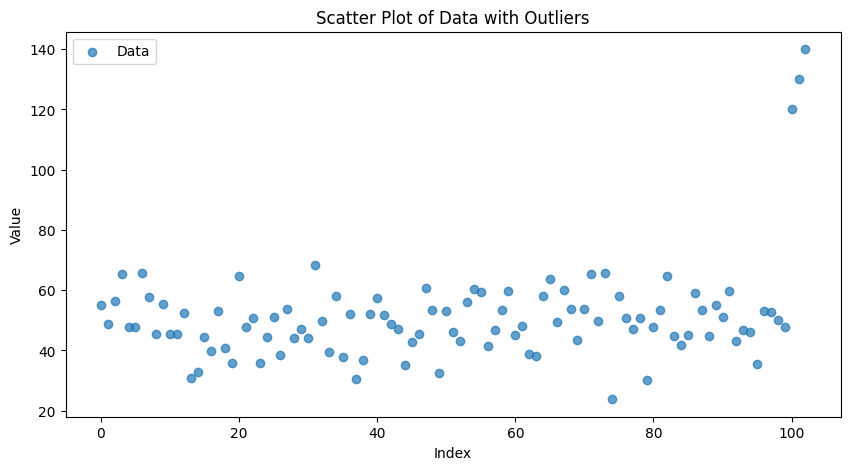

In [13]:
plt.figure(figsize=(10, 5))
plt.scatter(range(len(df)), df['Value'], label='Data', alpha=0.7)
plt.title("Scatter Plot of Data with Outliers")
plt.xlabel("Index")
plt.ylabel("Value")
plt.legend()
plt.show()

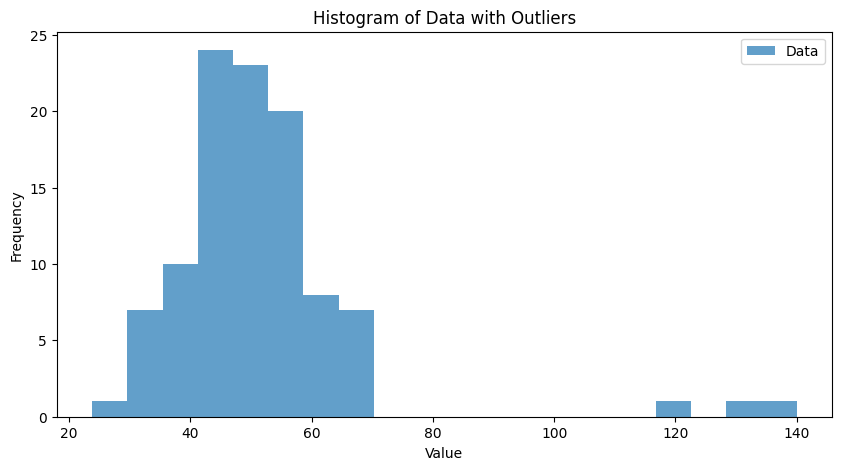

In [15]:
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=20, alpha=0.7, label='Data')
plt.title("Histogram of Data with Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [7]:
## Z-Score method
df['Z_Score'] = zscore(df['Value'])
df['Z_Outlier'] = df['Z_Score'].apply(lambda x: abs(x) > 3)  # Outlier if |Z-Score| > 3

In [5]:
## IQR method
Q1 = df['Value'].quantile(0.25)
Q3 = df['Value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df['IQR_Outlier'] = (df['Value'] < lower_bound) | (df['Value'] > upper_bound)

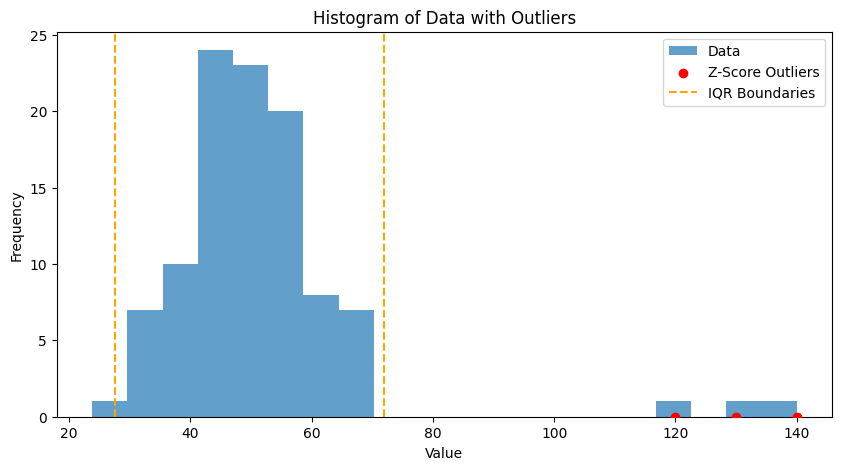

In [8]:
## Histogram with Z-Score outliers
plt.figure(figsize=(10, 5))
plt.hist(df['Value'], bins=20, alpha=0.7, label='Data')
plt.scatter(df[df['Z_Outlier']]['Value'], np.zeros_like(df[df['Z_Outlier']]['Value']), color='red', label='Z-Score Outliers', zorder=5)
plt.axvline(lower_bound, color='orange', linestyle='--', label='IQR Boundaries')
plt.axvline(upper_bound, color='orange', linestyle='--')
plt.title("Histogram of Data with Outliers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

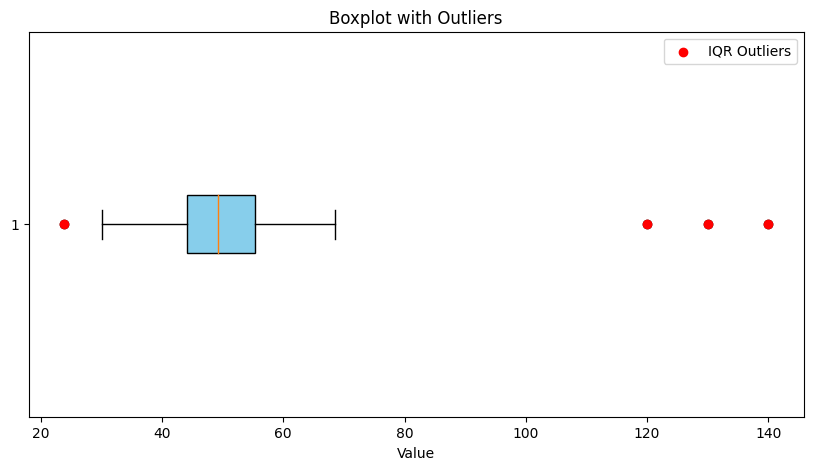

In [10]:
## Boxplot highlighting IQR outliers
plt.figure(figsize=(10, 5))
plt.boxplot(df['Value'], vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
plt.scatter(df[df['IQR_Outlier']]['Value'], np.ones_like(df[df['IQR_Outlier']]['Value']), color='red', label='IQR Outliers', zorder=5)
plt.title("Boxplot with Outliers")
plt.xlabel("Value")
plt.legend()
plt.show()

In [11]:
print("Z-Score Method Outliers:")
print(df[df['Z_Outlier']])

print("\nIQR Method Outliers:")
print(df[df['IQR_Outlier']])

Z-Score Method Outliers:
     Value  IQR_Outlier   Z_Score  Z_Outlier
100  120.0         True  4.203638       True
101  130.0         True  4.815716       True
102  140.0         True  5.427794       True

IQR Method Outliers:
          Value  IQR_Outlier   Z_Score  Z_Outlier
74    23.802549         True -1.684398      False
100  120.000000         True  4.203638       True
101  130.000000         True  4.815716       True
102  140.000000         True  5.427794       True
